# Introduction to Regression with Neural Network in tensorflow



In [57]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating data to view and fit

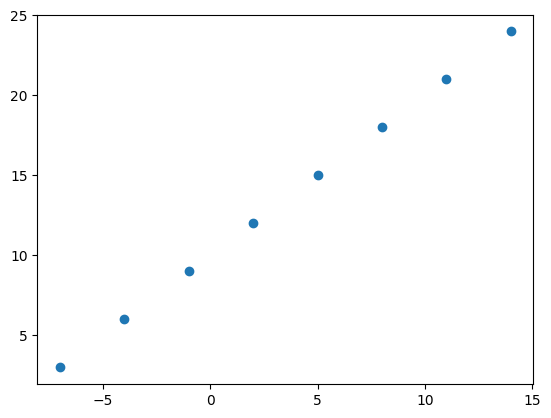

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [59]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [60]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [61]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [62]:
X[0], y[0]

(-7.0, 3.0)

In [63]:
X[1], y[1]

(-4.0, 6.0)

In [64]:
input_shape = X[0].shape
output_shape = X[0].shape
input_shape, output_shape

((), ())

In [65]:
X[0].ndim

0

In [66]:
# Turn our Numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [67]:
input_shape = X[0].shape
output_shape = X[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

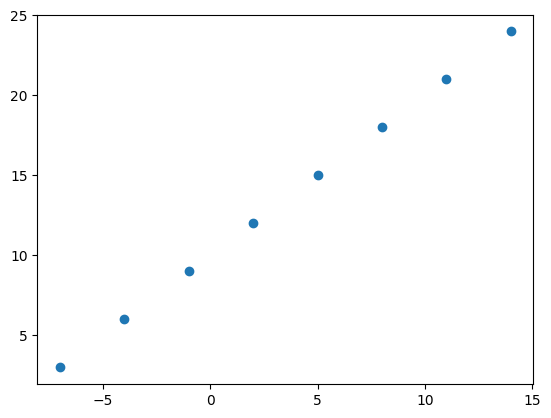

In [68]:
plt.scatter(X,y)

##  Steps in modelling with Tensorflow

1. ** Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. ** Compiling a model** - defind the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3.  **Fitting a model** - letting the model try to find patterns between X & y (features and label)



In [69]:
# Set random seed
tf.random.set_seed(42)

# 1.  Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.  Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step - loss: 18.7797 - mae: 18.7797
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 18.4985 - mae: 18.4985
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 18.2172 - mae: 18.2172
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 17.9360 - mae: 17.9360
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 17.6547 - mae: 17.6547


In [70]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [71]:
# try make a prediction using the model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[-15.02477]], dtype=float32)

## Improve our model

we can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons layers, change the activation function of each layer)

2. Compliling a model - here we might change the optimization function or perhaps the **learning rate** of the model.

3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data to learn from.

In [72]:
#Let's rebuild the model

# 1.  Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.  Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - loss: 10.7598 - mae: 10.7598
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.6273 - mae: 10.6273
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.4948 - mae: 10.4948
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.3623 - mae: 10.3623
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.2298 - mae: 10.2298
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.0973 - mae: 10.0973
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.9648 - mae: 9.9648
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.8323 - mae: 9.8323
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.6998 - mae: 9.6998
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.5673 - mae: 9.5673
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.4348 - mae: 9.4348
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.3023 - mae: 9.3023
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [73]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [74]:
# let's see if our model's prediction has improved..
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[30.191805]], dtype=float32)

In [75]:
# Let's see if we can make another model to improve our model

# 1 . Create the model (this time with an extra hidden layer with 100 hidden units)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
  ])

# 2.  Compile the model
model_2.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step - loss: 14.5554 - mae: 14.5554
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.8397 - mae: 13.8397
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.1301 - mae: 13.1301
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.4256 - mae: 12.4256
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.7248 - mae: 11.7248
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.0259 - mae: 11.0259
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.3256 - mae: 10.3256
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.6201 - mae: 9.6201
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.9051 - mae: 8.9051
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.1766 - mae: 8.1766
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.4313 - mae: 7.4313
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 6.6663 - mae: 6.6663
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [76]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [77]:
model_2.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[26.276867]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building a neural network is :

'''
Build a model --> fit it --> evaluate it--> tweak a model --> fit it --> evaluate it....
'''



When it comes to evaluation... there a re 3 words you should memorize.

>"visualize, visualize, visualize"
* The data - what data are we working with? what does it look like?
* the model itself -  what does our model look like?
* The training of a model . how deos a model perform while it learns
* The prediction of the model - how do the predictions of a model line up against the ground truth (the original level)

In [78]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [79]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

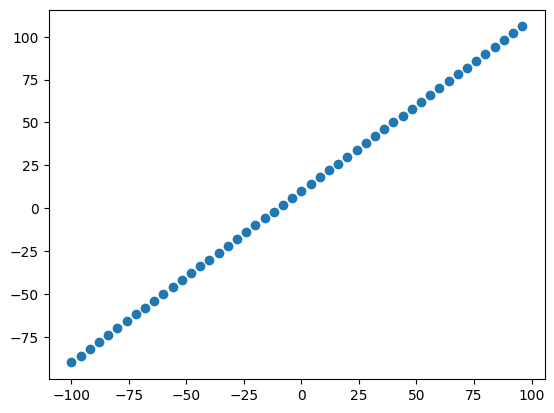

In [80]:
# Visulaize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data
* **Test set** - the model gets evaluated on this data, which is typically 10-15% of the total data


In [81]:
# Check the length of how many samples we have
len(X)

50

In [82]:
# Split the data into train and test set
X_train = X[:40]  # first 40 are the training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% are of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualing the data
Now've got our data in training and test sets...let's visualize it again!

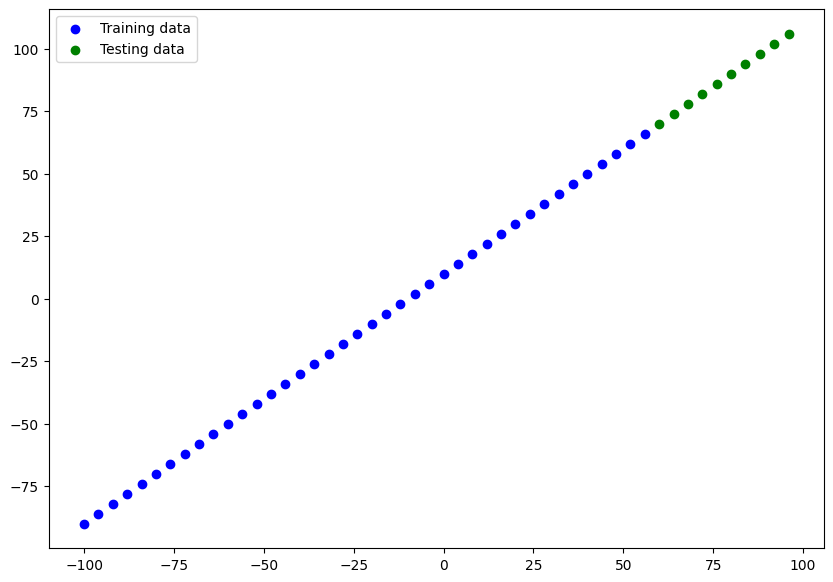

In [83]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show the legend
plt.legend();

In [84]:
# Let's have a look at how to build a NEURAL BETWORK FOR OUR DATA

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_3.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])


### Visualizing the model

In [85]:
model_3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
X[0] , y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [87]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model_3.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non - training (this is typical when you bring in already learn patterns or parameters from other model during transfer learning)



In [89]:
# Let's fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

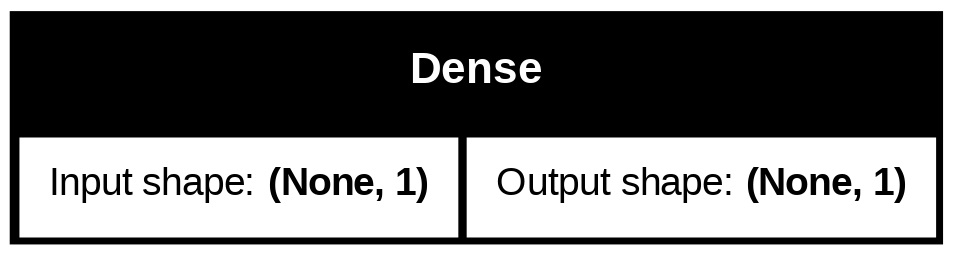

In [90]:
from tensorflow.keras.utils import plot_model

plot_model(model = model_3, show_shapes=True)

## Visualize our model's predictions

To visualise predicitions, it's a good idea to plot them against the ground truth labels.


In [91]:
# Make some predicitons
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[ 70.94565 ],
       [ 75.52724 ],
       [ 80.108826],
       [ 84.69041 ],
       [ 89.27199 ],
       [ 93.85358 ],
       [ 98.435165],
       [103.01675 ],
       [107.59833 ],
       [112.17992 ]], dtype=float32)

In [92]:
# Let's create a plotting function
def plot_predicitons(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

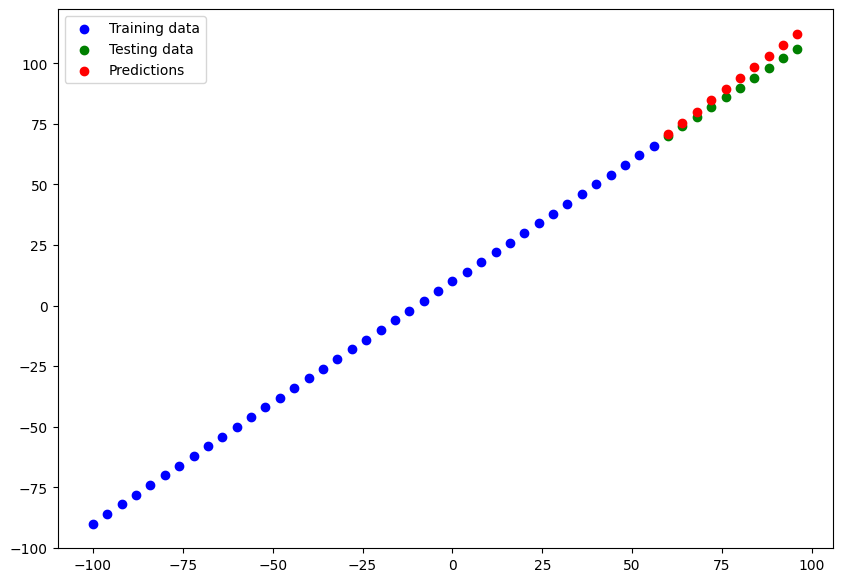

In [93]:
plot_predicitons()

### Evaluating our model predictions with regression evaluation metrics

In [94]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 3.5628 - mae: 3.5628


[3.562783718109131, 3.562783718109131]

In [95]:
# Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()(y_true=y_test, y_pred=tf.squeeze(y_pred))  # Call MeanAbsoluteError as a function
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.5627837>

In [96]:
# Calaculate the mean squared error
mse = tf.keras.metrics.MeanSquaredError()(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=15.483917>

In [97]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.MeanAbsoluteError()(y_true=y_true, y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.keras.metrics.MeanSquaredError()(y_true=y_true, y_pred=tf.squeeze(y_pred))

###  running experiment ot improve our model


In [98]:
## let's bUild our first model

model__1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model__1.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics =[ "mae"])
model__1.fit( tf.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.6085 - mae: 40.6085  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.1054 - mae: 10.1054
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6799 - mae: 7.6799 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9744 - mae: 11.9744 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0541 - mae: 8.0541 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7749 - mae: 9.7749 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0363 - mae: 8.0363 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7633 - mae: 9.7633 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1444 - mae: 8.1444 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6883 - mae: 8.6883 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5551 - mae: 8.5551 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3226 - mae: 8.3226 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


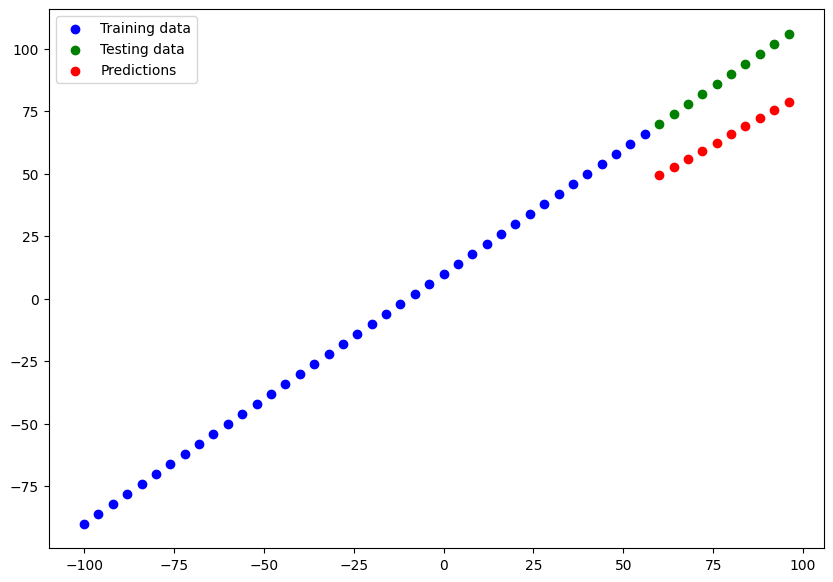

In [99]:
# make and plot predictions for model__1
y_pred__1 = model__1.predict(tf.expand_dims(X_test, -1))
plot_predicitons(predictions=y_pred__1)

In [100]:
tf.squeeze(y_pred__1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([49.645996, 52.86206 , 56.078125, 59.294193, 62.51026 , 65.726326,
       68.94239 , 72.15846 , 75.37453 , 78.59059 ], dtype=float32)>

In [101]:
# Calculate model__1 evaluation metrics

mae__1 = mae(y_true=y_test, y_pred=y_pred__1)
mse__1 = mse(y_true=y_test, y_pred=y_pred__1)
mae__1, mse__1

(<tf.Tensor: shape=(), dtype=float32, numpy=23.881706>,
 <tf.Tensor: shape=(), dtype=float32, numpy=575.40594>)

**Build model__2**
* 2 dense layers, trained for 100 epochs

In [102]:
# Set the random seed
tf.random.set_seed(42)

# Create model 2
model__2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model__2.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

# Fit the model
model__2.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 42.8902 - mae: 42.8902 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.3375 - mae: 24.3375 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.9873 - mae: 22.9873 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.9187 - mae: 15.9187 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.3108 - mae: 9.3108 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.4029 - mae: 11.4029 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.6152 - mae: 13.6152 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.4268 - mae: 15.4268 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2786 - mae: 5.2786 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.9900 - mae: 12.9900 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6314 - mae: 9.6314 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9219 - mae: 6.9219 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


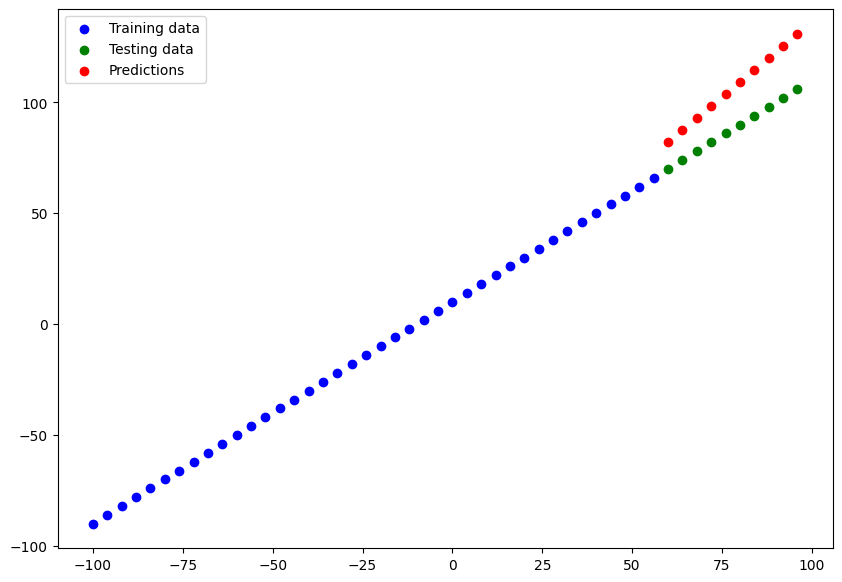

In [103]:
# Make and plot prediction of model__2
y_pred__2 = model__2.predict(tf.expand_dims(X_test, -1))
plot_predicitons(predictions=y_pred__2)

In [104]:
# Calculate model__2 evaluation metrics
mae__2 = mae(y_true=y_test, y_pred=y_pred__2)
mse__2 = mse(y_true=y_test, y_pred=y_pred__2)
mae__2, mse__2

(<tf.Tensor: shape=(), dtype=float32, numpy=18.553833>,
 <tf.Tensor: shape=(), dtype=float32, numpy=360.7706>)

we can see that the model__1 above is far better than the model__2 above.

**Build model__3**
* 2 layers, trained for 500 epochs

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model__3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model__3.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

# fit the model
model__3.fit(tf.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 23.2403 - mae: 23.2403 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.9109 - mae: 21.9109
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.2054 - mae: 22.2054 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.4171 - mae: 14.4171 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.7361 - mae: 18.7361 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.3350 - mae: 13.3350 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.3490 - mae: 15.3490 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.0915 - mae: 11.0915
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.9002 - mae: 14.9002 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.9180 - mae: 10.9180
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.7258 - mae: 14.7258 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.8499 - mae: 10.8499
Epoch 13/500
2/2 ━━━━━━━━━━

In [ ]:
# Make and plot prediction of model__2
y_pred__3 = model__3.predict(tf.expand_dims(X_test, -1))
plot_predicitons(predictions=y_pred__3)

In [ ]:
# Calculate model__3 evaluation metrics
mae__3 = mae(y_true=y_test, y_pred=y_pred__3)
mse__3 = mse(y_true=y_test, y_pred=y_pred__3)
mae__3, mse__3

### Comparing the results of our experiments

we've run a few experiments, let's compare the results.

In [ ]:
# let's compare our model's results using a pandas Dataframe

import pandas as pd

model_results = [["model__1", mae__1.numpy(), mse__1.numpy()],
                [ "model__2", mae__2.numpy(), mse__2.numpy()],
                 ["model__3", mae__3.numpy(), mse__3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

model_1 performed the best

In [ ]:
model__1.summary()

### Saving our models

saving our model allows us to use them outside if google colab (or whenever they were trained) such s in web application or a mobile app.

There are two main format we save our model's too:

1. The SavedModel format
2.The HDF5 format

In [ ]:
# Save model
model__1.export("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model__1.save("best_model_HDF5_format.h5")

## loading in a saved model

In [ ]:
# Load the SavedModel as an inference-only layer
loaded_SavedModel_model = tf.keras.layers.TFSMLayer("best_model_SavedModel_format", call_endpoint='serving_default')

## A Larger Example

In [1]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Let's try one-hot or Datafrmae so its all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [4]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [5]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [6]:
# view y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [7]:
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [8]:
# Build a neural network (sort of like model_1 above)
## let's bUild our first model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics =[ "mae"])

insurance_model.fit(tf.expand_dims(tf.constant(X_train, dtype=tf.float32), axis=-1), y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13249.9844 - mae: 13249.9844
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13116.2334 - mae: 13116.2334
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13233.4316 - mae: 13233.4316
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13660.3398 - mae: 13660.3398
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13105.6084 - mae: 13105.6084
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13468.9990 - mae: 13468.9990
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12928.8496 - mae: 12928.8496
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13315.4805 - mae: 13315.4805
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 13443.2090 - mae: 13443.2090
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 14180.7217 - mae: 14180.7217
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13414.2754 - mae: 13414.2754
Epoch 12/100
34/34 ━━━━━━━━━

In [9]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(tf.expand_dims(tf.constant(X_test, dtype=tf.float32), axis=-1), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12396.5420 - mae: 12396.5420  


[11974.470703125, 11974.470703125]

In [10]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

let's improve our model

In [11]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics =[ "mae"])

insurance_model_2.fit(tf.expand_dims(tf.constant(X_train, dtype=tf.float32), axis=-1), y_train, epochs = 100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13296.1572 - mae: 13296.1572
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13273.8574 - mae: 13273.8574
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13234.0645 - mae: 13234.0645
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13159.7012 - mae: 13159.7012
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13034.1348 - mae: 13034.1348
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12846.3291 - mae: 12846.3291
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12604.8906 - mae: 12604.8906
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12343.7773 - mae: 12343.7773
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12142.2744 - mae: 12142.2744
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12066.8477 - mae: 12066.8477
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12041.6641 - mae: 12041.6641
Epoch 12/100
34/34 ━━━━━━━━━━━

In [12]:
# Evaluate the model_2
insurance_model_2.evaluate(tf.expand_dims(tf.constant(X_test, dtype=tf.float32), axis=-1), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8770.9883 - mae: 8770.9883  


[8619.9169921875, 8619.9169921875]

In [13]:
# Evaluate the model_1
insurance_model.evaluate(tf.expand_dims(tf.constant(X_test, dtype=tf.float32), axis=-1), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12396.5420 - mae: 12396.5420 


[11974.470703125, 11974.470703125]

In [14]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics =[ "mae"])

history = insurance_model_3.fit(tf.expand_dims(tf.constant(X_train, dtype=tf.float32), axis=-1), y_train, epochs = 250, verbose=1)

Epoch 1/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13242.4775 - mae: 13242.4775
Epoch 2/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12281.1055 - mae: 12281.1055
Epoch 3/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11869.2920 - mae: 11869.2920
Epoch 4/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11339.7686 - mae: 11339.7686
Epoch 5/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9839.2529 - mae: 9839.2529
Epoch 6/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8371.9238 - mae: 8371.9238
Epoch 7/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8219.1680 - mae: 8219.1680
Epoch 8/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8220.0430 - mae: 8220.0430
Epoch 9/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8223.7139 - mae: 8223.7139
Epoch 10/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8230.0176 - mae: 8230.0176
Epoch 11/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8228.7598 - mae: 8228.7598
Epoch 12/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [15]:
# Evaluate the third model
insurance_model_3.evaluate(tf.expand_dims(tf.constant(X_test, dtype=tf.float32), axis=-1), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8786.3105 - mae: 8786.3105  


[8623.2607421875, 8623.2607421875]

Text(0.5, 0, 'epochs')

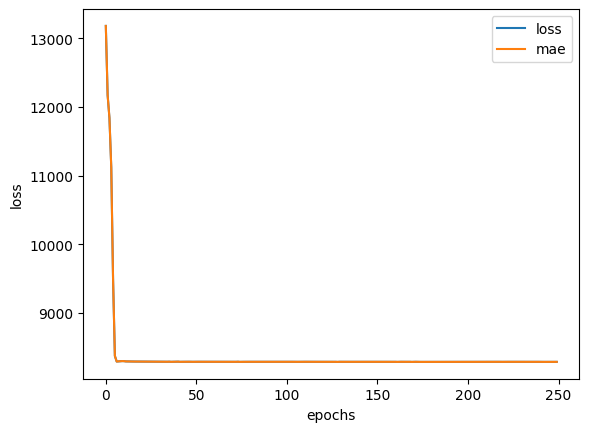

In [16]:
# plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

if you're not sure on which to use, you could try both and see which performs better

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"]
    ))

# Create X & y
X = insurance.drop("charges", axis =1)
y = insurance["charges"]

# Build our own train and test set
X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [38]:
# what does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [39]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [40]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! our data has been normalized and encoded.
Now let's build a neural network model on it and see how it goes

In [42]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)
# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(2)

])

# compile the model
insurance_model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# fit the model
insurance_model_4.fit(X_train_normal, y_train)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 13297.7773 - mae: 13297.7773


In [43]:
# Evaluate our insurance model trained on normlized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13421.0000 - mae: 13421.0000  


[12964.787109375, 12964.787109375]